## Домашнее задание № 4

###### Выполнил: Степанов Николай
###### Группа: ИАД 3
###### Дедлайн: 3.06 в 00:30

### Ансамблевые методы 

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [0]:
data = pd.read_csv('./diabetes.csv')

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Пропусков нет!

In [11]:
data.shape[0]

768

##### Данных не так уж и много (совсем мало)

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [12]:
for idx in np.array(data.columns):
    if data.loc[data[idx] == 0].shape[0] != 0:
        print('Нулей в фиче ' + idx + ' :', data[idx][data[idx] == 0].shape[0])
        print(data[idx][data[idx] == 0][:3])

Нулей в фиче Pregnancies : 111
4     0
16    0
45    0
Name: Pregnancies, dtype: int64
Нулей в фиче Glucose : 5
75     0
182    0
342    0
Name: Glucose, dtype: int64
Нулей в фиче BloodPressure : 35
7     0
15    0
49    0
Name: BloodPressure, dtype: int64
Нулей в фиче SkinThickness : 227
2    0
5    0
7    0
Name: SkinThickness, dtype: int64
Нулей в фиче Insulin : 374
0    0
1    0
2    0
Name: Insulin, dtype: int64
Нулей в фиче BMI : 11
9     0.0
49    0.0
60    0.0
Name: BMI, dtype: float64
Нулей в фиче Outcome : 500
1    0
3    0
5    0
Name: Outcome, dtype: int64


##### Pregnancies - нормально, что у девушке не могло быть беремености
##### Glucose - грустно, когда у тебя глюкоза 0. Меняем!
##### BloodPressure - интресно как им живется с давление 0? Меняем!
##### SkinThickness - толщина кожной складки трицепса...Погуглив и зайдя на сайт ВОЗ, там говорят, что 0 она не равна, поэтому меняем!
##### Insulin - без инсулина и без диабета это сильно. Меняем!
##### BMI - ну тут очевидно. Меняем!

In [0]:
data['Glucose'].replace(0, data['Glucose'].mean(), inplace = True);
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace = True);
data['SkinThickness'].replace(0, data['SkinThickness'].mean(), inplace = True);
data['Insulin'].replace(0, data['Insulin'].mean(), inplace = True);
data['BMI'].replace(0, data['BMI'].mean(), inplace = True);

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

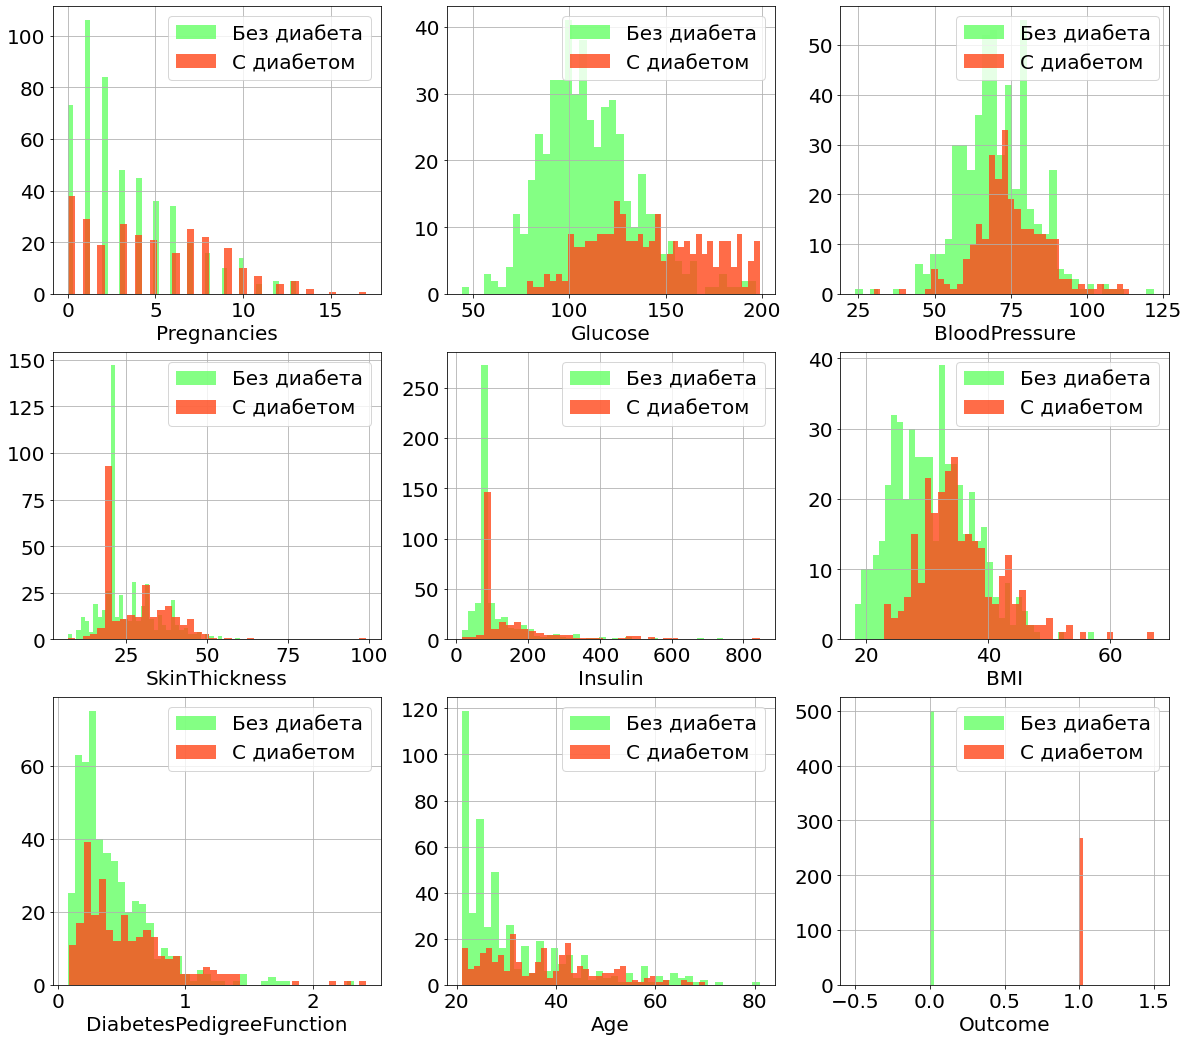

In [14]:
idx = data.columns

counter = 0
fig, ax = plt.subplots(3, 3)

fig.set_figwidth(20)
fig.set_figheight(18)

for i in range(3):
    for j in range(3):
        ax[i, j].hist(data[idx[counter]][data['Outcome'] == 0], color = '#66ff66', histtype='stepfilled', bins = 40, alpha=0.8, label = 'Без диабета')
        ax[i, j].hist(data[idx[counter]][data['Outcome'] == 1], color = '#ff471a', histtype='stepfilled', bins = 40, alpha=0.8, label = 'С диабетом')
        ax[i, j].tick_params(axis='both', which='major', labelsize=20)
        ax[i, j].set_xlabel(idx[counter], fontsize = 20)
        ax[i, j].legend(fontsize = 20)
        ax[i, j].grid()
        
        counter += 1

#### Небольшое review
##### После 6 беременностей показатели женщин с диабетом увеличиваются, что логично
##### Уровень глюкозы больше 150, скорее всего, подвержает диабет у девушки
##### Кровенное давление особо не является внушительным признаком для константирования диабета
##### Значение жировой прослойки трицепса в районе от 35 до 45 (примерно) показывает больший шанс иметь диабет
##### Значение инсулина в крови меньше 100 скорее говорит о том, что девушка здорова
##### Чем больше показатель BMI - тем выше шанс быть больным диабетом

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Outcome']), data['Outcome'], test_size = 0.7 , random_state=42)

In [0]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
random_forest = RandomForestClassifier(n_estimators=10)

In [0]:
def metric(y_test, y_predict):
  print('Доля верных ответов: ', accuracy_score(y_test, y_predict))
  print('Точность: ', precision_score(y_test, y_predict))
  print('Полнота: ', recall_score(y_test, y_predict))

In [0]:
bagging.fit(X_train, y_train);
random_forest.fit(X_train, y_train);

Bagging (DecisionTreeClassifier) result:

In [21]:
metric(y_test, bagging.predict(X_test))

Доля верных ответов:  0.7211895910780669
Точность:  0.6196319018404908
Полнота:  0.5343915343915344


RandomForestClassifier result:

In [22]:
metric(y_test, random_forest.predict(X_test))

Доля верных ответов:  0.7527881040892194
Точность:  0.6842105263157895
Полнота:  0.5502645502645502


##### Видно, что случайный лес отработал лучше. Возмонжо, это связано с тем, что случайный лес рандомизирует выборку по двум "направлениям": выбирает случайной подмножество обектов и смотрит лучше разибение не на всех признаках, а, опять же, на случайном их подмножестве, что позволяет уменьшить переобученность модели.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [0]:
n_est = np.arange(10, 1600, 150)
auc_roc_n_est = []

min_samples_leaf = np.arange(1, 12)
auc_roc_min_samples_leaf = []

In [67]:
for number in n_est:
  print('n_estimators: ', number)
  random_forest = RandomForestClassifier(n_estimators=number)
  random_forest.fit(X_train, y_train)
  auc_roc_n_est.append(roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

for number in min_samples_leaf:
  print('Min_samples_leaf: ', number)
  random_forest = RandomForestClassifier(min_samples_leaf=number)
  random_forest.fit(X_train, y_train)
  auc_roc_min_samples_leaf.append(roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

n_estimators:  10
n_estimators:  160
n_estimators:  310
n_estimators:  460
n_estimators:  610
n_estimators:  760
n_estimators:  910
n_estimators:  1060
n_estimators:  1210
n_estimators:  1360
n_estimators:  1510
Min_samples_leaf:  1
Min_samples_leaf:  2
Min_samples_leaf:  3
Min_samples_leaf:  4
Min_samples_leaf:  5
Min_samples_leaf:  6
Min_samples_leaf:  7
Min_samples_leaf:  8
Min_samples_leaf:  9
Min_samples_leaf:  10
Min_samples_leaf:  11


Text(0, 0.5, 'AUC-ROC')

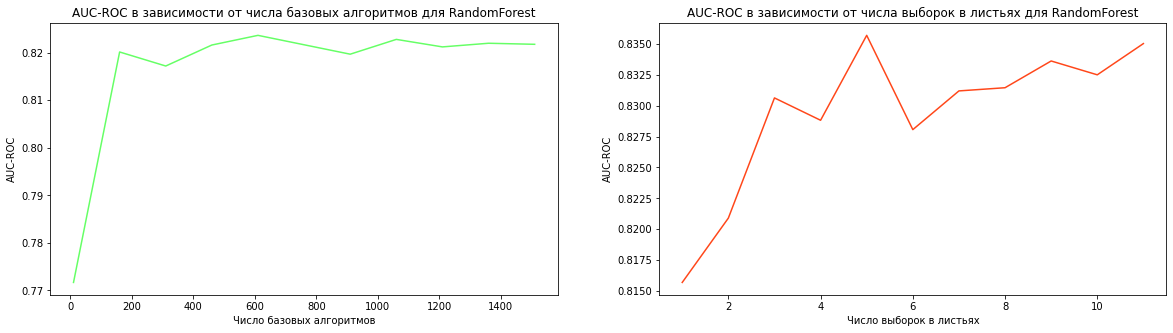

In [68]:
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(20)
fig.set_figheight(5)

ax[0].plot(n_est, auc_roc_n_est, color = '#66ff66')
ax[0].set_title('AUC-ROC в зависимости от числа базовых алгоритмов для RandomForest')
ax[0].set_xlabel('Число базовых алгоритмов')
ax[0].set_ylabel('AUC-ROC')
ax[1].plot(min_samples_leaf, auc_roc_min_samples_leaf, color = '#ff471a')
ax[1].set_title('AUC-ROC в зависимости от числа выборок в листьях для RandomForest')
ax[1].set_xlabel('Число выборок в листьях')
ax[1].set_ylabel('AUC-ROC')

#### Видно, что Random Forest с ростом числа базовых алгоритмов не переобучается и показывает наилучший резульаты при числе деревьев 610. Оптимальное минимальное число выборок в листьях 5.


In [69]:
random_forest = RandomForestClassifier(min_samples_leaf=5, n_estimators=610)
random_forest.fit(X_train, y_train)
print('AUC-ROC: ', roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

AUC-ROC:  0.829869165112718


**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

##### Наиболее важными признаками показалаись - уровень глюкозы, значение жировой прослойки трицепса и показатель BMI (исходя из распрделения признаков, которые были построены раньше)

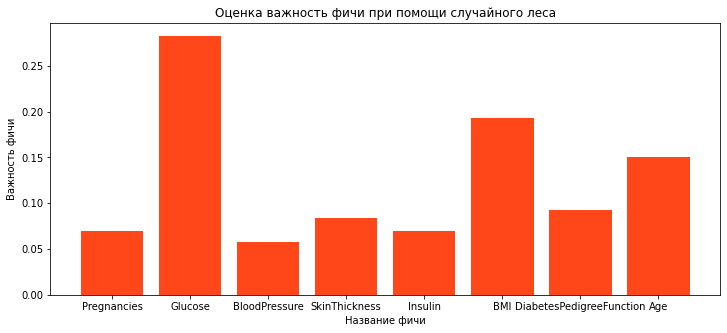

In [28]:
importance = random_forest.feature_importances_

fig, ax = plt.subplots()

ax.bar(data.drop(columns=['Outcome']).columns, importance, color = '#ff471a')
ax.set_title('Оценка важность фичи при помощи случайного леса')
ax.set_xlabel('Название фичи')
ax.set_ylabel('Важность фичи')
fig.set_figwidth(12)
fig.set_figheight(5)

##### Видно, что предположение про уровень глюкозы в крови и показатель BMI были сделаны верно, а вместо значения жировой прослойки трицепса алгоритм в качестве важного признака выделил возраст, что тоже, в принципе, логично.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [0]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
histBoosting = HistGradientBoostingClassifier()
Boosting = GradientBoostingClassifier()

In [0]:
histBoosting.fit(X_train, y_train);
Boosting.fit(X_train, y_train);

In [39]:
print('RandomForest', metric(y_test, random_forest.predict(X_test)))
print('HistGradientBoostingClassifier', metric(y_test, histBoosting.predict(X_test)))
print('GradientBoostingClassifier', metric(y_test, Boosting.predict(X_test)))

Доля верных ответов:  0.7602230483271375
Точность:  0.6829268292682927
Полнота:  0.5925925925925926
RandomForest None
Доля верных ответов:  0.7211895910780669
Точность:  0.6077348066298343
Полнота:  0.582010582010582
HistGradientBoostingClassifier None
Доля верных ответов:  0.7304832713754646
Точность:  0.6208791208791209
Полнота:  0.5978835978835979
GradientBoostingClassifier None


##### Без подбора параметров - случайные лес показывает лучшую точность при равное полноте с другими алгоритмами

In [0]:
Boosting = GradientBoostingClassifier()

In [0]:
params = {
'n_estimators':[60, 100, 140, 180, 220, 300, 400, 500, 600]
}

In [0]:
grid_Boosting = GridSearchCV(Boosting, params)

In [0]:
grid_Boosting.fit(X_train, y_train);

In [76]:
print('Grid GradientBoostingClassifier', metric(y_test, grid_Boosting.predict(X_test)))

Доля верных ответов:  0.7174721189591078
Точность:  0.6045197740112994
Полнота:  0.5661375661375662
Grid GradientBoostingClassifier None


In [77]:
grid_Boosting.best_params_

{'n_estimators': 180}

In [78]:
print('AUC-ROC: ', roc_auc_score(y_test, grid_Boosting.predict_proba(X_test)[:, 1]))

AUC-ROC:  0.8079622807416504


In [0]:
n_est = [60, 100, 140, 180, 220, 300, 400, 500, 600]
auc_roc_n_est = []

In [80]:
for number in n_est:
  print('n_estimators: ', number)
  boosting = GradientBoostingClassifier(n_estimators=number)
  boosting.fit(X_train, y_train)
  auc_roc_n_est.append(roc_auc_score(y_test, boosting.predict_proba(X_test)[:, 1]))

n_estimators:  60
n_estimators:  100
n_estimators:  140
n_estimators:  180
n_estimators:  220
n_estimators:  300
n_estimators:  400
n_estimators:  500
n_estimators:  600


Text(0, 0.5, 'AUC-ROC')

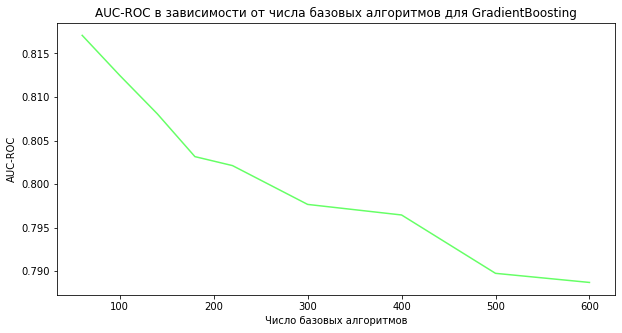

In [81]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

ax.plot(n_est, auc_roc_n_est, color = '#66ff66')
ax.set_title('AUC-ROC в зависимости от числа базовых алгоритмов для GradientBoosting')
ax.set_xlabel('Число базовых алгоритмов')
ax.set_ylabel('AUC-ROC')

##### Отличие histGradientBoosting от GradientBoosting заключается в том, что в первой модели изначальные данные предварительно скомпонованы в целочисленные бины, что значительно сокращает количество расщепление точек, чтобы рассмотреть, и позволяет алгоритму использовать целочисленные структуры данных. Тем самым это увеличивает скорость работы алгоритма для выборок с больше 10 000 объектов. Для меньших же выборок - это может быть минусом, так как мы теряем информацию при биниризации, когда у нас ее и так не много. 

##### Также отличие заключается в том, что "'та оценка имеет встроенную поддержку для пропущенных значений (NaN). Во время обучения производитель дерева в каждой точке разделения узнает, должны ли образцы с пропущенными значениями идти к левому или правому потомку, основываясь на потенциальном выигрыше. При прогнозировании выборки с пропущенными значениями соответственно назначаются левому или правому дочернему элементу. Если во время обучения не было найдено пропущенных значений для данного объекта, тогда выборки с пропущенными значениями сопоставляются с тем, какой из них имеет больше выборок." - цитата из документации к алгоритму histGradientBoosting


##### Даже при подборе числа деревьев Boosting не показал результат лучше, чем Random Forest

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>

In [0]:
estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=610, min_samples_leaf=5)),
    ('support_vector_machine', make_pipeline(StandardScaler(),
                          SVC(random_state=42)))
]

In [0]:
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [86]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('random_forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                          

In [87]:
metric(y_test, stacking_classifier.predict(X_test))

Доля верных ответов:  0.7509293680297398
Точность:  0.6666666666666666
Полнота:  0.582010582010582


In [88]:
print('AUC-ROC: ', roc_auc_score(y_test, stacking_classifier.predict_proba(X_test)[:, 1]))

AUC-ROC:  0.8229863100923274


##### Видно, что заметно качество не улучшилось и случайный лес попрежнему показывает самый лучший результат. Это может говорить о том, что случайный лес уменьшает вариативность одного случайного дерева и лучше приспосабливается к новым данным.